Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [195]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [197]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [198]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [199]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [200]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, image_size=(img_height, img_width), batch_size=32, validation_split=0.2, subset='training')
##todo

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [201]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, image_size=(img_height, img_width), batch_size=32, validation_split=0.2, subset='validation')
##todo

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [202]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

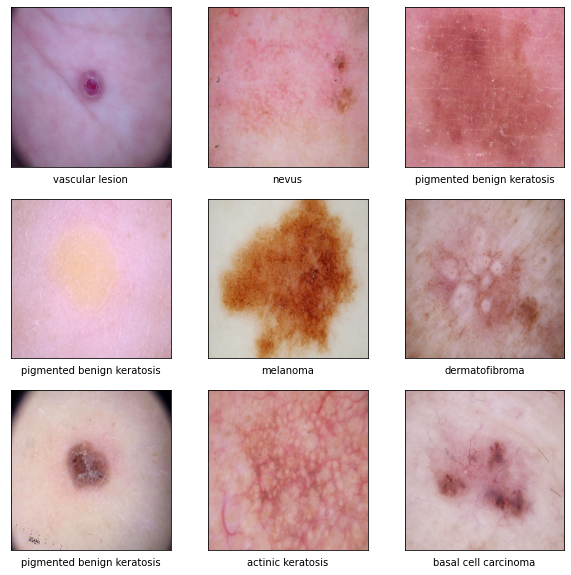

In [203]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.xlabel(class_names[labels[i]])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [204]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [205]:
### Your code goes here
num_classes = 9

model= Sequential()
model.add(layers.experimental.preprocessing.Rescaling((1./255), input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(16, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [206]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [207]:
# View the summary of all layers
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 activation_30 (Activation)  (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 activation_31 (Activation)  (None, 90, 90, 32)        0         
                                                     

### Train the model

In [208]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 122ms/step - loss: 2.1502 - accuracy: 0.1858 - val_loss: 2.0376 - val_accuracy: 0.2036
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.9940 - accuracy: 0.2517 - val_loss: 1.9123 - val_accuracy: 0.3333
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.8084 - accuracy: 0.3566 - val_loss: 1.6946 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6456 - accuracy: 0.4163 - val_loss: 1.5263 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4205 - accuracy: 0.5050 - val_loss: 1.5057 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3932 - accuracy: 0.5179 - val_loss: 1.4048 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2458 - accuracy: 0.5714 - val_loss: 1.3738 - val_accuracy: 0.5257
Epoch 8/20


### Visualizing training results

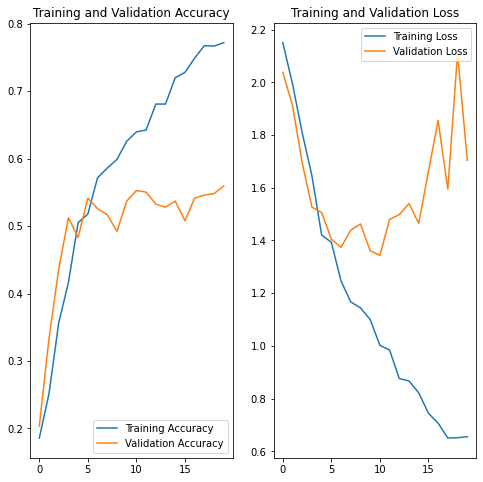

In [209]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [210]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

# Your code goes here
data_augment=keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical', input_shape=(img_height, img_width,3)),
                              layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                              layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')])

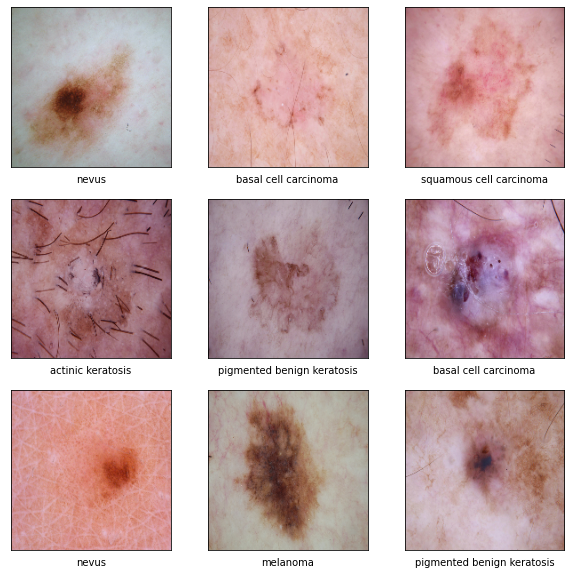

In [211]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.xlabel(class_names[labels[i]])

### Todo:
### Create the model, compile and train the model


In [212]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([data_augment,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(layers.Conv2D(16, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

### Compiling the model

In [213]:
## Your code goes here
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [214]:
## Your code goes here, note: train your model for 20 epochs
history = epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/20


56/56 [==============================] - 17s 213ms/step - loss: 2.1548 - accuracy: 0.2048 - val_loss: 2.0613 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 12s 211ms/step - loss: 1.8358 - accuracy: 0.3337 - val_loss: 1.6597 - val_accuracy: 0.3781
Epoch 3/20
56/56 [==============================] - 12s 209ms/step - loss: 1.6507 - accuracy: 0.4068 - val_loss: 1.7105 - val_accuracy: 0.4049
Epoch 4/20
56/56 [==============================] - 11s 202ms/step - loss: 1.5230 - accuracy: 0.4554 - val_loss: 1.5450 - val_accuracy: 0.4631
Epoch 5/20
56/56 [==============================] - 12s 209ms/step - loss: 1.4715 - accuracy: 0.4660 - val_loss: 1.5488 - val_accuracy: 0.4631
Epoch 6/20
56/56 [==============================] - 12s 212ms/step - loss: 1.3726 - accuracy: 0.5318 - val_loss: 1.4478 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 13s 224ms/step - loss: 1.3429 - accuracy: 0.5273 - val_loss: 1.4433 - val_accuracy: 0.4944
Epoch 8/20

### Visualizing the results

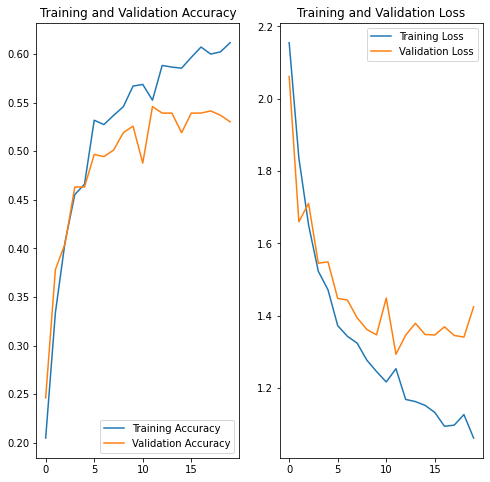

In [215]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Finding from Second Model

1. There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

2. We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

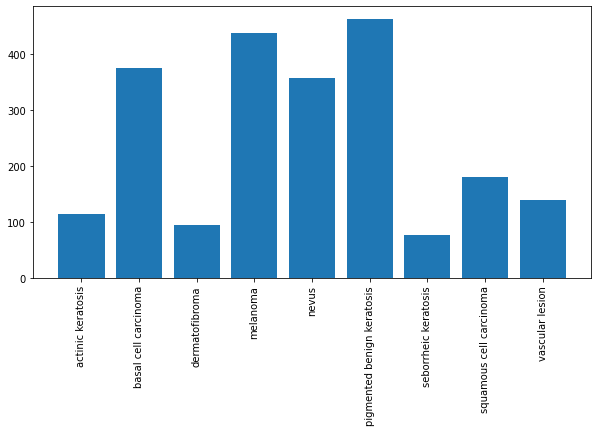

In [216]:
## Your code goes here.
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
count=[]
for i in class_names:
    count.append(len(list(data_dir_train1.glob(i+'/*.jpg'))))
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.bar(class_names,count)

In [217]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
1,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
2,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
3,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
4,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
2235,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
2236,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
2237,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion


In [218]:
original_df.Label.value_counts(normalize=True)*100

pigmented benign keratosis    20.634212
melanoma                      19.562305
basal cell carcinoma          16.793211
nevus                         15.944618
squamous cell carcinoma        8.083966
vascular lesion                6.208129
actinic keratosis              5.091559
dermatofibroma                 4.242966
seborrheic keratosis           3.439035
Name: Label, dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- **seborrheic keratosis** has least number of samples

Answer-2:- 
**melanoma and pigmented benign keratosis** have proprtionate number of classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [219]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [220]:
#path_to_training_dataset="/content/drive/MyDrive/ISIC/Train"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.set_seed(123)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1DB5F2C10>: 100%|██████████| 500/500 [01:00<00:00,  8.27 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1CA297C10>: 100%|██████████| 500/500 [00:49<00:00, 10.00 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1DB25B7F0>: 100%|██████████| 500/500 [00:50<00:00,  9.94 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1CD32D9A0>: 100%|██████████| 500/500 [00:49<00:00, 10.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1C2967370>: 100%|██████████| 500/500 [00:53<00:00,  9.39 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1B6E84A60>: 100%|██████████| 500/500 [00:50<00:00,  9.82 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1C2853880>: 100%|██████████| 500/500 [00:51<00:00,  9.77 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB2680DA340>: 100%|██████████| 500/500 [00:52<00:00,  9.54 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1DB0679D0>: 100%|██████████| 500/500 [00:49<00:00, 10.05 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [221]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output")
image_count_train1 = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train1)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [222]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output")
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
1,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
2,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
3,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
4,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
6735,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
6736,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
6737,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion


In [223]:
new_df.Label.value_counts(normalize=True)*100

pigmented benign keratosis    22.614631
basal cell carcinoma          17.599050
melanoma                      16.916456
nevus                         14.779641
squamous cell carcinoma        7.627244
vascular lesion                6.870456
actinic keratosis              5.297522
dermatofibroma                 5.149132
seborrheic keratosis           3.145867
Name: Label, dtype: float64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [224]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [228]:
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_train2=pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output")


#paths = [str(file) for file in data_dir_train1.glob('*')] + [str(file) for file in data_dir_train2.glob('*')]
files = []
for file in data_dir_train1.glob('*'):
    files.append(file)
for file in data_dir_train2.glob('*'):
    files.append(file)
# do something with the list of files

train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  files,
  seed=123,
  validation_split = 0.2,
  subset ='training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

TypeError: ignored

#### **Todo:** Create a validation dataset

In [ ]:
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
class_names = train_ds1.class_names
print(class_names)

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
## your code goes here
num_classes=9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history =  model.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)# your model fit code

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Accuracy on training data has increased by using Augmentor library

- Model is still overfitting

- The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter

- The rebalancing has really helped in improving the performance of the model
